## Radiation Instrumentation and Measurement Laboratory
#### Assignment Two
#### Micheal Jones
Due: Oct. 8, 2018

## Gaussian (Normal) Distribution Probability

$$ N(x, \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \ e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

## Poisson Distribution Probability

$$ P(k,\lambda) = e^{- \lambda} \frac{\lambda^k}{k !} $$


In [1]:
# This code block imports packages for use in answering the questions

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Here I define the functions I'll need

def poissonDist(x, rate):
     return (1/np.exp(rate))*rate**x/(np.math.factorial(x))
    
def gaussianDist(x, mean, stdev):
    return (np.sqrt(2*np.pi*stdev**2))**(-1)*np.exp(-((x-mean)**2)/(2*stdev**2))

def meanGaussianDist(x, mean):
    return (np.sqrt(2*np.pi*mean))**(-1)*np.exp(-((x-mean)**2)/(2*mean))

def chiSqr(o,e):
    if e > 0:
        return (o-e)**2/e
    else:
        return 0

#### 1.) Plot N(x, $\mu$, $\sqrt{\mu}$) and P(k, $\lambda$) on the same graph where the expectation value is 20.

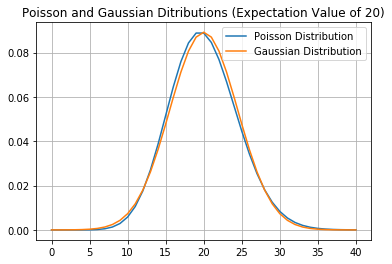

In [5]:
t20 = np.arange(0,41,1)
p20 = np.zeros(len(t20))
g20 = np.zeros(len(t20))
stdev = np.sqrt(20)

i=0
for i in range (0,41):
    p20[i] = poissonDist(i, 20)
    g20[i] = meanGaussianDist(i, 20)


plt.plot(t20, p20, label = 'Poisson Distribution')
plt.plot(t20, g20, label = 'Gaussian Distribution')
plt.title('Poisson and Gaussian Ditributions (Expectation Value of 20)' )
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig('poissonVsGaussian.png')
plt.show()

#### 2.) For the given data, is it described by a Poisson distribution?

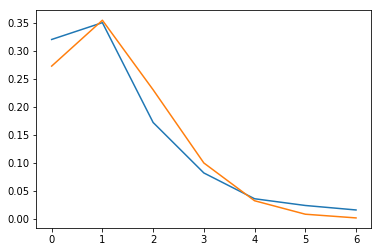

 Chi Squared Value =  10.374208738110756


In [6]:
datax = np.arange(0,7,1)
datay = [160, 175, 86, 41, 18, 12, 8]
freq = np.zeros(len(datay))
pdata = np.zeros(len(datax))
expectationArray = np.zeros(len(datax))
chiArray = np.zeros(len(datax))
cuml = sum(datay)

i=0
for i in range (0,7):
    freq[i] = datay[i]/cuml
    expectationArray[i] = freq[i]*datax[i]
    
expectation = sum(expectationArray)
    
j=0
for j in range (0,7):
    pdata[j] = poissonDist(j,expectation)
    chiArray[j] = chiSqr(pdata[j]*datay[j], freq[j]*datay[j])

chi = sum(chiArray)

plt.plot(datax, freq)
plt.plot(datax, pdata)
plt.savefig('poissonDesc.png')
plt.show()
print(' Chi Squared Value = ', chi**2)



Given a reasonably good curve fit and appropriate $\chi^2$ value ($\chi^2 \approx 10.4$), I would say that this is described decently well by a Poisson distribution.

#### 3.) 
#### Show, 
$$ P(c | \phi \ s ) = \sum_{n=c}^{\infty} P(c| \phi \ n ) P(n|s) = e^{- \phi s} \frac{(\phi s)^c}{c !} $$
#### Given,
$$ P(c| \phi \ n ) = \frac{n ! }{(n-c) ! c !} \ \phi^{c} (1-\phi)^{n-c} $$ 

$$ P(n|s) = e^{- s} \frac{s^n}{n !} $$


Firstly, the $n !$ terms cancel. Then factor out $s^c$, 


$$ P(c | \phi \ s ) = \sum_{n=c} P(c| \phi \ n ) P(n|s) = e^{- s} \frac{(\phi s)^c}{c !} \sum_{n=c} \frac{(s(1- \phi))^{n-c}}{(n-c) ! } . $$


Next, substitute an exponential exression for the summation and combine the two exponentials,


$$ P(c | \phi \ s ) =  e^{- s} \frac{(\phi s)^c}{c !} e^{s - s \phi} = e^{- \phi s} \frac{(\phi s)^c}{c !} . $$

#### 4.) 
#### Show,
$$ P(n \ | \ \phi , \ c , \ s ) = P(n|s)\frac{P(c \ | \ \phi \ n )}{P(c \ | \ \phi \ s )} = e^{-s(1-\phi)}\frac{(s(1-\phi))^{n-c}}{(n-c) !} \ . $$ 

Starting the same way as we did in the last problem (cancel the $n !$ terms and factor out $s^c$) and utilizing the previous result for $P(c \ | \ \phi \ s )$ we have,

$$ P(n \ | \ \phi , \ c , \ s ) = P(n|s)\frac{P(c \ | \ \phi \ n )}{P(c \ | \ \phi \ s )} = \frac{e^{- s} \frac{(\phi s)^c}{c !} \frac{(s(1- \phi))^{n-c}}{(n-c) ! }}{e^{- \phi s} \frac{(\phi s)^c}{c !}} \ . $$

Canceling out like terms and combining the exponentials and, finally, factoring $-s$ out of the exponential argument yields,

$$ P(n \ | \ \phi , \ c , \ s ) = e^{- s + \phi s} \frac{(s(1- \phi))^{n-c}}{(n-c) ! } = e^{-s(1-\phi)}\frac{(s(1-\phi))^{n-c}}{(n-c) !} \ . $$